In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-01.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

# Distances Analysis

### Inital view of the data

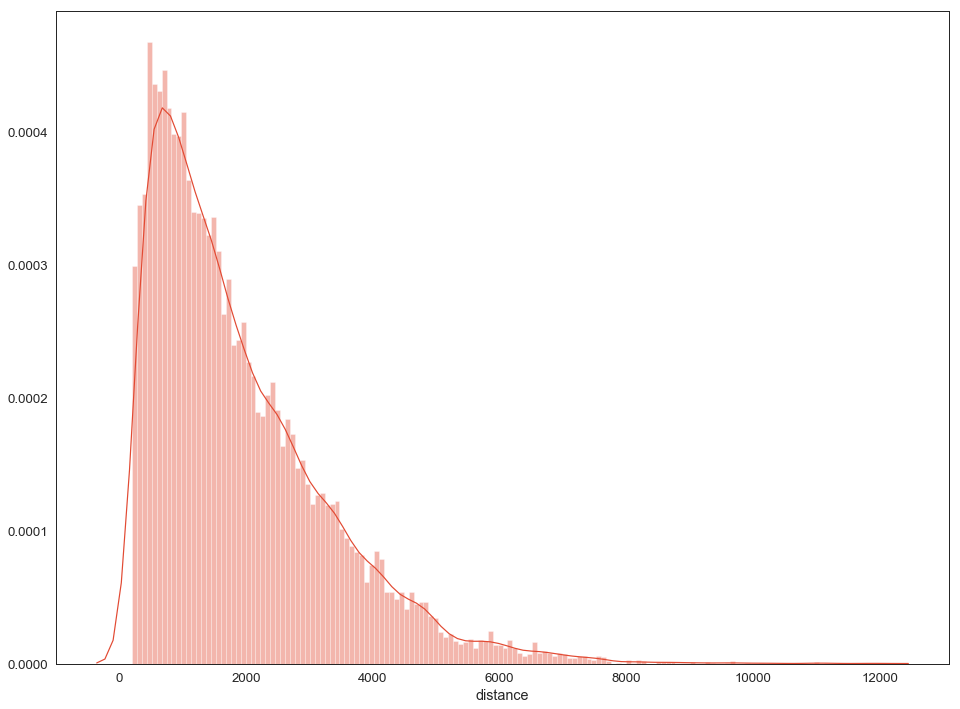

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 150)

In [5]:
distance = df["distance"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
beta,3539.036006,-660708.114309,inf,1.781810e-08
gamma,3380.189860,-657366.761686,inf,2.052830e-08
burr,3206.387731,-587063.817417,inf,4.000171e-07
norm,4678.311996,-575305.986359,inf,6.579297e-07
lognorm,4119.332658,-532242.427907,inf,4.056206e-06


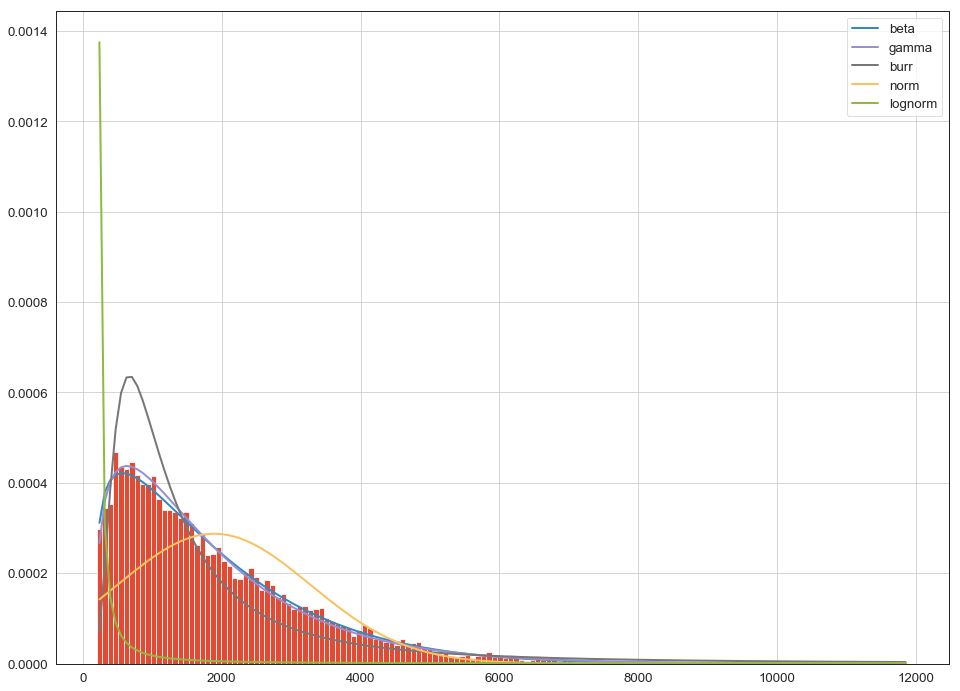

In [6]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=150)
f.fit()
f.summary()

In [7]:
f.get_best(method = 'sumsquare_error')

{'beta': (1.224484383778314,
  10.990126264648953,
  199.29592999197394,
  16854.234170378644)}

In [8]:
f.get_best(method = 'aic')

{'burr': (1.4708962647785873,
  9.627722307456196,
  -0.9829405279911385,
  215.05788083536936)}

In [9]:
f.get_best(method = 'bic')

{'beta': (1.224484383778314,
  10.990126264648953,
  199.29592999197394,
  16854.234170378644)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,3539.036006,-660708.114309,inf,1.781810e-08
burr,3206.387731,-587063.817417,inf,4.000171e-07
norm,4678.311996,-575305.986359,inf,6.579297e-07
alpha,3184.652501,-574719.630026,inf,6.741447e-07
bradford,2934.206605,-572679.141491,inf,7.348383e-07


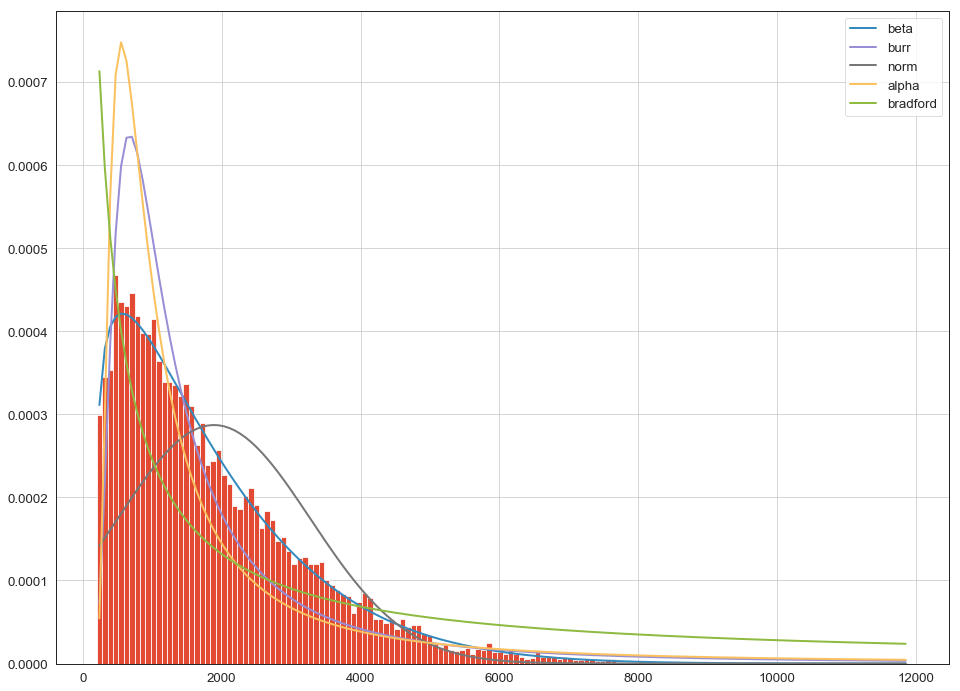

In [10]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
chi,3531.892248,-614614.802146,inf,1.249571e-07
expon,3271.781198,-604223.420756,inf,1.939125e-07
dgamma,3797.265517,-581030.071407,inf,5.163805e-07
cosine,3042.870841,-550421.693377,inf,1.882581e-06
chi2,378536.481064,-535467.087967,3.760229,3.539601e-06


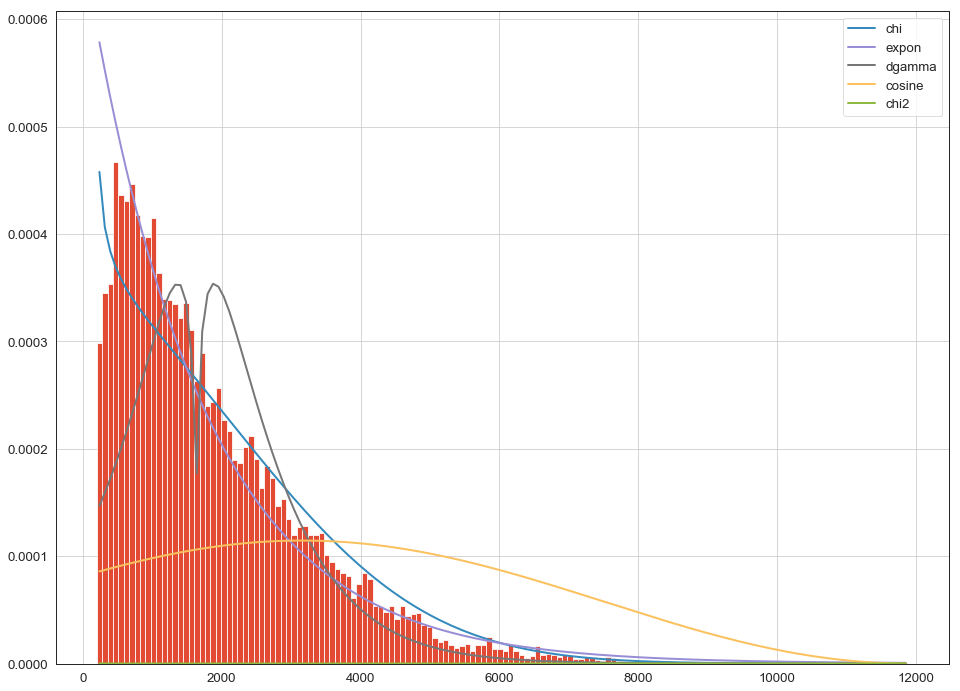

In [11]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gamma,3380.189860,-657366.761686,inf,2.052830e-08
exponnorm,3301.666262,-622143.174552,inf,9.091411e-08
f,3289.112262,-611935.095344,inf,1.398760e-07
fisk,3222.991757,-611701.406785,inf,1.413239e-07
fatiguelife,3375.543556,-554742.085946,inf,1.567830e-06


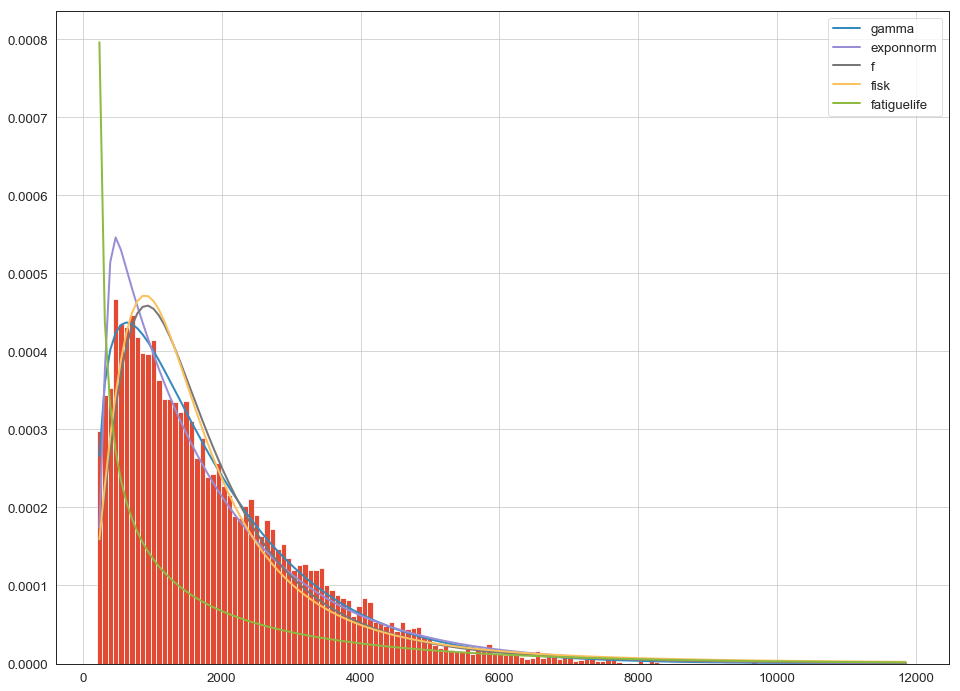

In [12]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gengamma,3274.118679,-604314.646077,inf,1.930022e-07
genexpon,3277.736306,-604189.791700,inf,1.939404e-07
levy,3118.894725,-577393.999503,inf,6.023777e-07
loggamma,4703.059005,-575179.494243,inf,6.611737e-07
lognorm,4119.332658,-532242.427907,inf,4.056206e-06


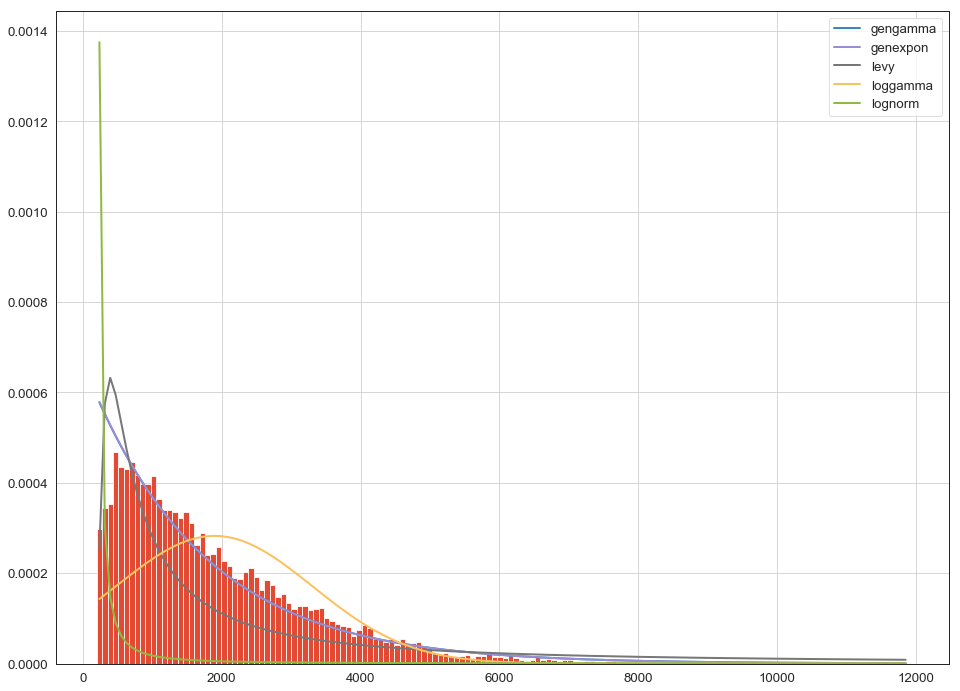

In [13]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pearson3,3380.189814,-657366.768249,inf,2.052829e-08
logistic,3860.601610,-579111.096793,inf,5.602267e-07
t,4678.488190,-575301.784889,inf,6.577666e-07
powerlaw,2931.981769,-554377.279199,inf,1.592180e-06
pareto,3225.967532,-528869.556385,inf,4.677406e-06


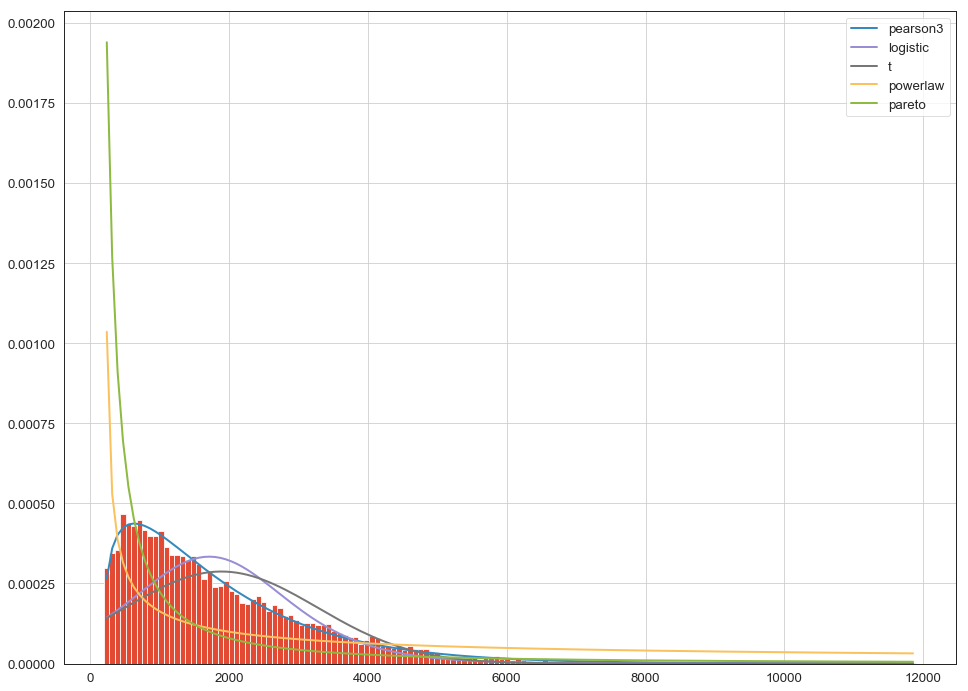

In [14]:
f = Fitter(distance,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins=150)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
beta,3539.036006,-660708.114309,inf,1.781810e-08
pearson3,3380.189814,-657366.768249,inf,2.052829e-08
gamma,3380.189860,-657366.761686,inf,2.052830e-08
chi,3531.892248,-614614.802146,inf,1.249571e-07
gengamma,3274.118679,-604314.646077,inf,1.930022e-07


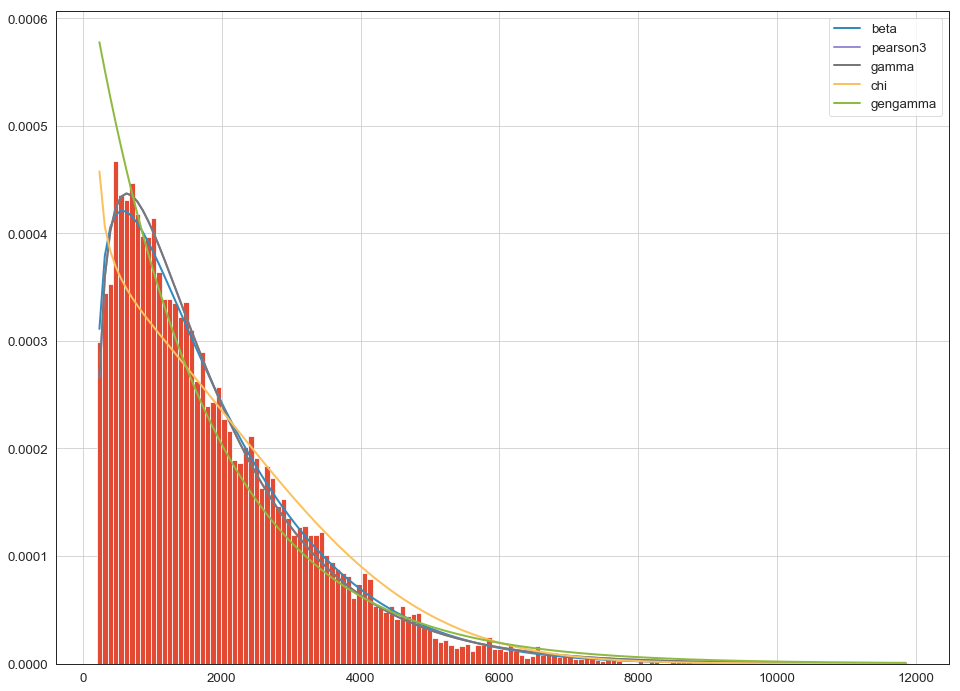

In [15]:
f = Fitter(distance,
           distributions= ['beta','chi','gamma', 'gengamma', 'pearson3'], bins=150)

f.fit()
f.summary()

## Rides Analysis

### Inital view of the data

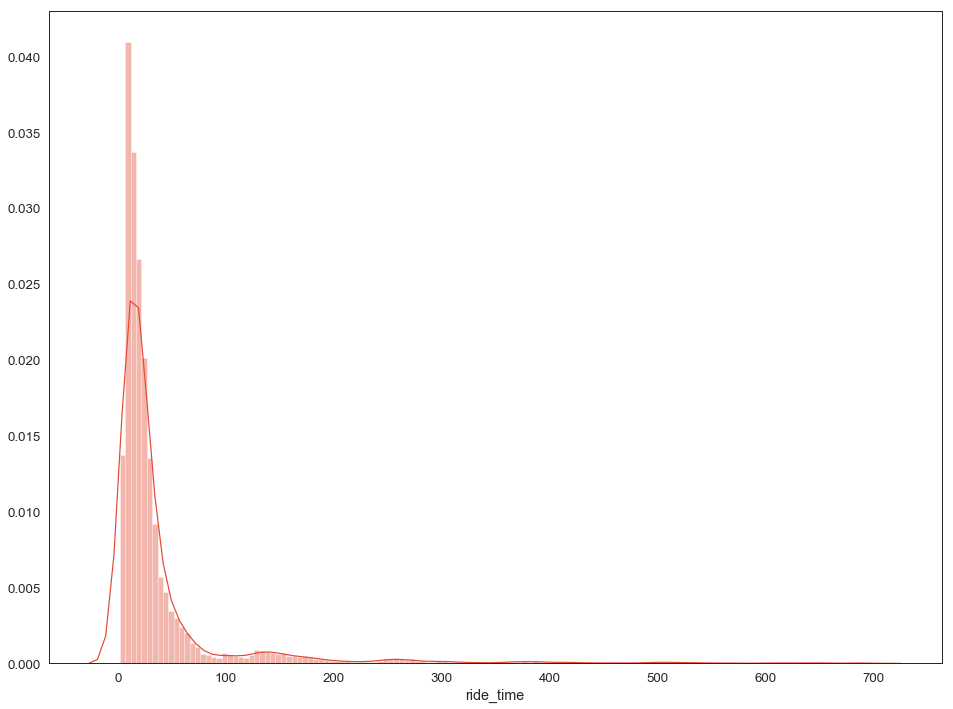

In [16]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 140)

In [17]:
rides = df["ride_time"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
burr,2615.342193,-473876.618373,inf,0.000048
lognorm,2805.645035,-430491.928003,inf,0.000299
beta,3376.330254,-397982.032414,inf,0.001179
norm,5237.039567,-375140.772181,inf,0.003096
gamma,26309.441092,-367657.372131,inf,0.004245


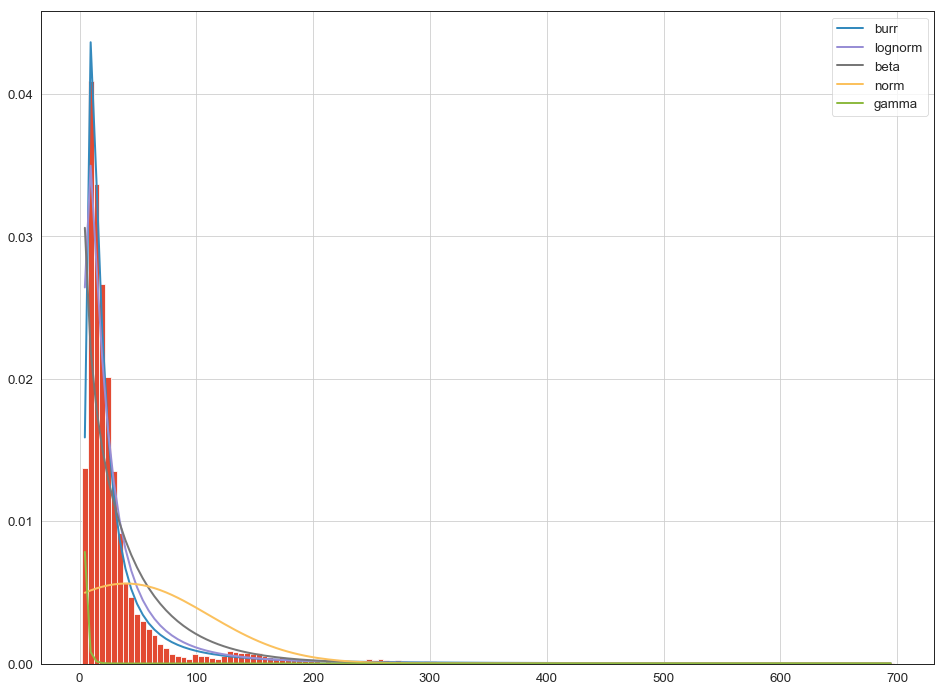

In [18]:
f = Fitter(rides,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins = 140)
f.fit()
f.summary()

In [19]:
f.get_best(method = 'sumsquare_error')

{'burr': (1.3572044703566912,
  16.319058058291077,
  0.13774863863309006,
  1.7996616498037747)}

In [20]:
f.get_best(method = 'aic')

{'burr': (1.3572044703566912,
  16.319058058291077,
  0.13774863863309006,
  1.7996616498037747)}

In [21]:
f.get_best(method = 'bic')

{'burr': (1.3572044703566912,
  16.319058058291077,
  0.13774863863309006,
  1.7996616498037747)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
burr,2615.342193,-473876.618373,inf,0.000048
alpha,2502.527618,-448618.029910,inf,0.000139
beta,3376.330254,-397982.032414,inf,0.001179
bradford,2006.710294,-379243.157200,inf,0.002602
norm,5237.039567,-375140.772181,inf,0.003096


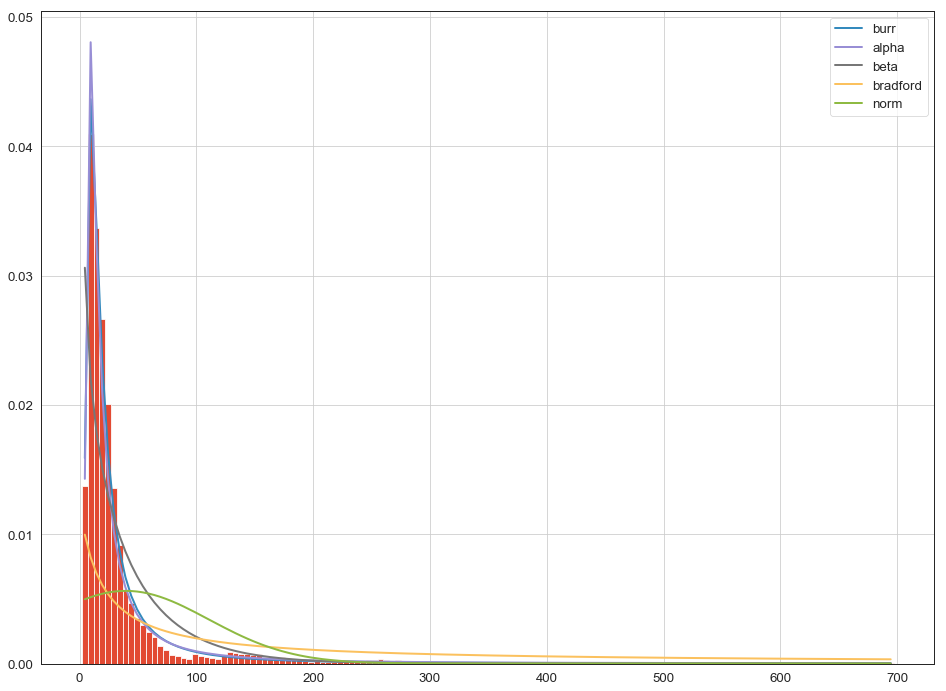

In [22]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
expon,3607.557895,-402729.737284,inf,0.000965
dgamma,3335.750053,-398963.680299,inf,0.001131
chi2,3201.696467,-395362.973886,inf,0.001317
chi,3730.553467,-388356.064020,inf,0.001771
cosine,2097.130411,-368850.719198,inf,0.004038


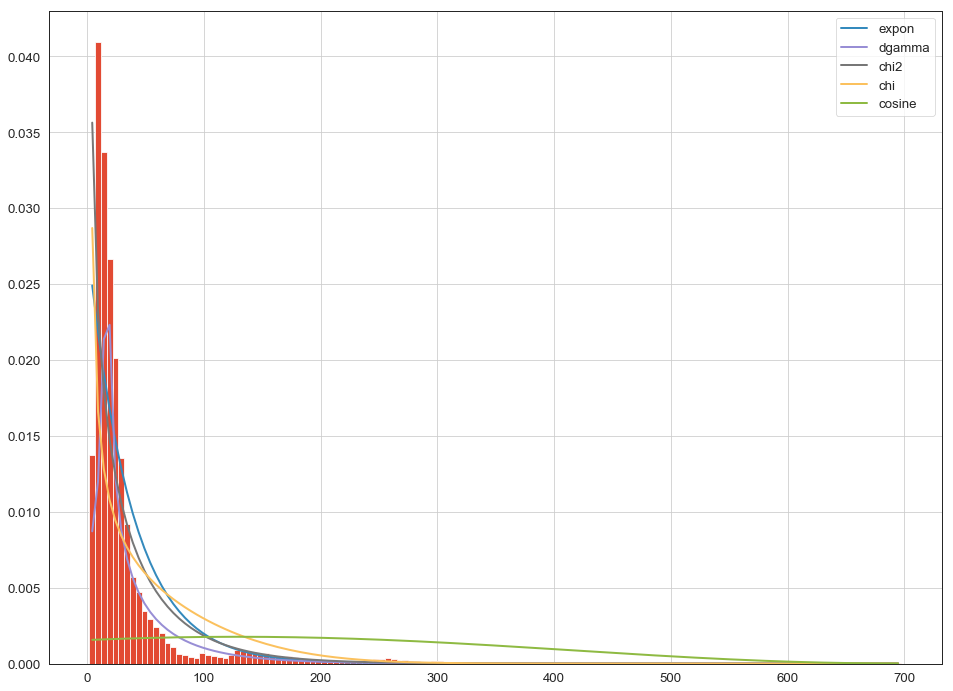

In [23]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
f,2624.282139,-470891.690273,inf,0.000054
fisk,2743.715624,-446536.782918,inf,0.000152
fatiguelife,2943.128572,-417472.712361,inf,0.000517
exponnorm,3740.295323,-411177.191628,inf,0.000675
gamma,26309.441092,-367657.372131,inf,0.004245


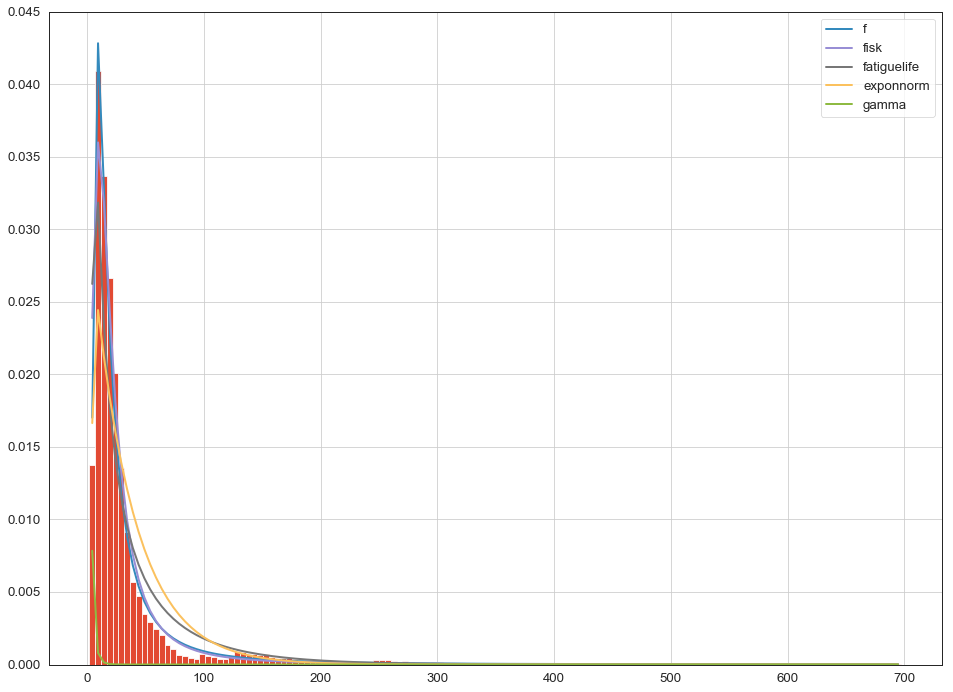

In [24]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,2805.645035,-430491.928003,inf,0.000299
genexpon,3613.556332,-402699.505040,inf,0.000965
levy,2263.247643,-398861.974612,inf,0.001136
gengamma,2852.306030,-396169.390086,inf,0.001272
loggamma,4955.582516,-374677.169941,inf,0.003156


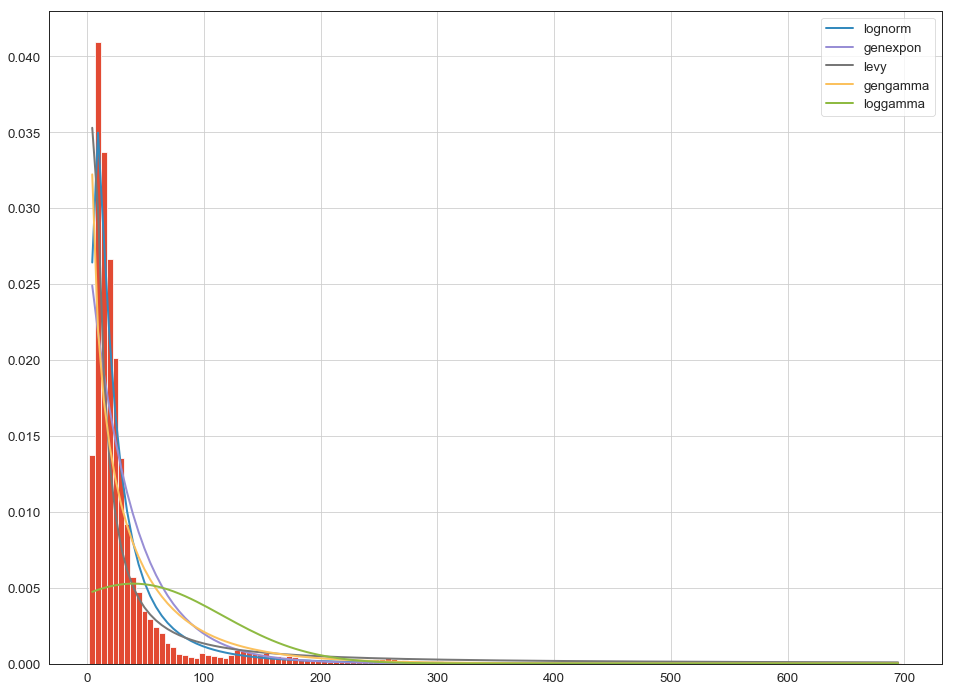

In [25]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
t,2815.160320,-424393.759338,inf,0.000386
pearson3,3329.568920,-398960.242003,inf,0.001131
logistic,4980.974838,-385240.403235,inf,0.002021
powerlaw,2004.545292,-379525.524138,inf,0.002571
pareto,2381.629658,-367621.328009,inf,0.004252


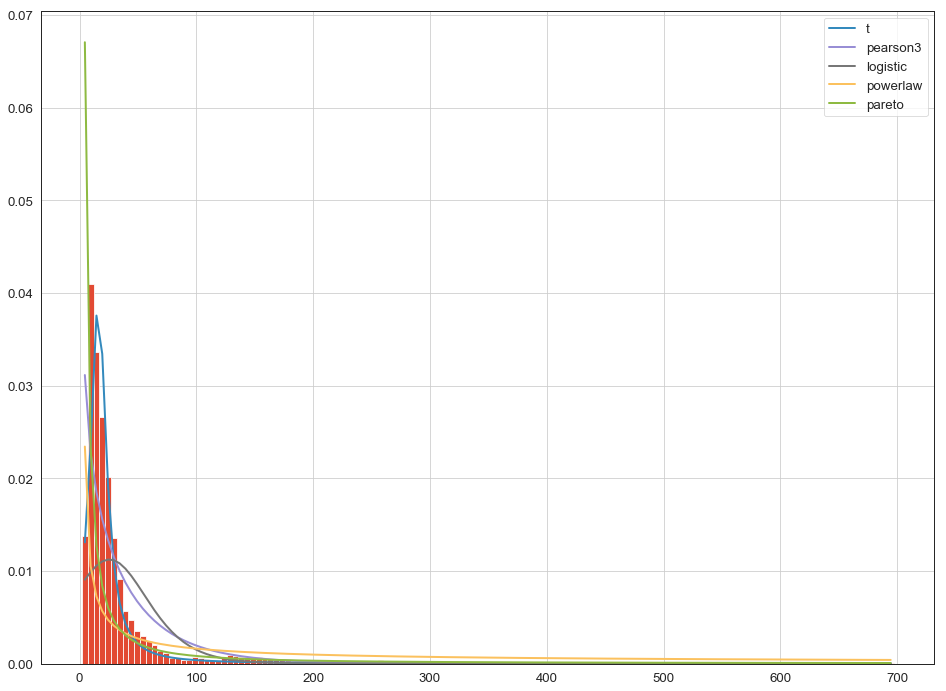

In [26]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins = 140)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
burr,2615.342193,-473876.618373,inf,0.000048
f,2624.282139,-470891.690273,inf,0.000054
alpha,2502.527618,-448618.029910,inf,0.000139
lognorm,2805.645035,-430491.928003,inf,0.000299


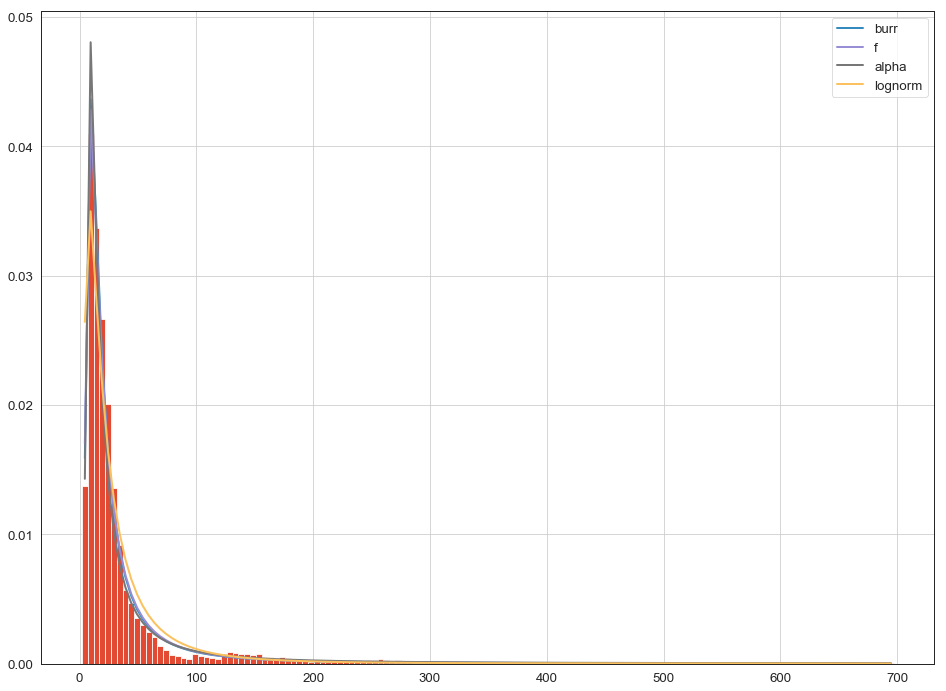

In [27]:
f = Fitter(rides,
           distributions= ['alpha','burr','f', 'lognorm'], bins = 140)
f.fit()
f.summary()